C:\Users\Mahla\AppData\Local\Temp\ipykernel_21956\2907526192.py:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


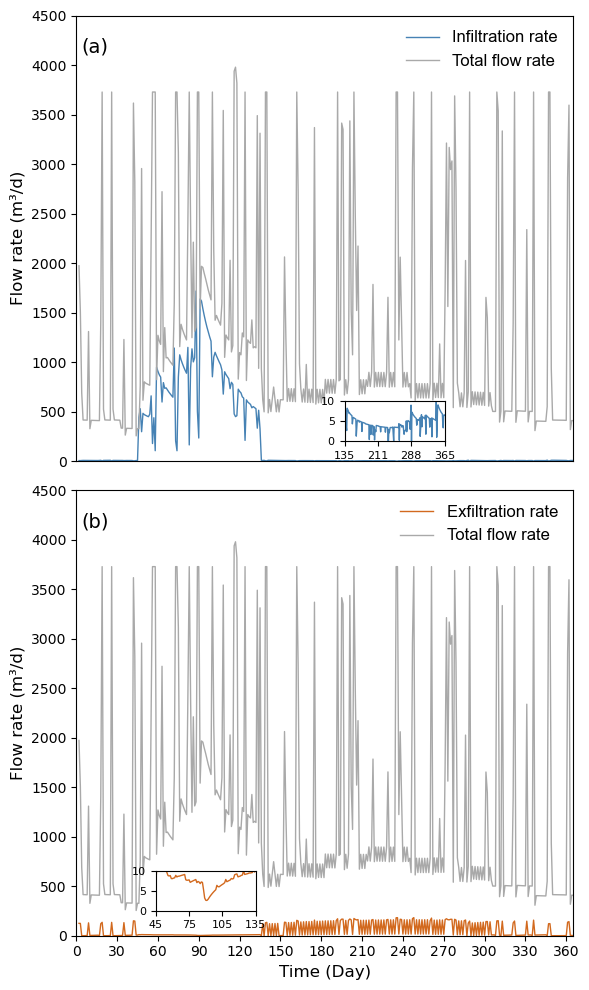

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

# ======= خواندن داده‌ها =======
time = pd.read_csv("timestep.csv").squeeze()  # فقط یک ستون و Series
df_in = pd.read_csv("IN.csv")
df_ex = pd.read_csv("EX.csv")
df_total = pd.read_csv("totalflow.csv").squeeze()

# ======= تنظیمات فونت =======
tick_fontsize = 10
label_fontsize = 12
annotation_fontsize = 14
legend_font = {'size': 12, 'family': 'Arial'}

# ======= ایجاد Figure با دو محور عمودی و ارتفاع مساوی =======
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6, 10), gridspec_kw={'height_ratios':[1,1]}, sharex=False)

# ======= نمودار Infiltration =======
for col in df_in.columns:
    ax1.plot(time, df_in[col], color='steelblue', linewidth=1, label="Infiltration rate")
ax1.plot(time, df_total, color='darkgray', linewidth=1, label="Total flow rate")

ax1.text(0.01, 0.95, '(a)', transform=ax1.transAxes,
         fontsize=annotation_fontsize, va='top', ha='left')

ax1.set_xticks([])
ax1.tick_params(axis='both', labelsize=tick_fontsize)
ax1.set_ylabel("Flow rate (m³/d)", fontsize=label_fontsize)
ax1.set_ylim(0, 4500)
ax1.set_xlim(0, 365)

ax1.legend(loc='upper right', frameon=False, prop=legend_font)

# ======= inset برای Infiltration =======
ax1_inset = inset_axes(ax1, width=1, height=0.4,
                       bbox_to_anchor=(0.54, 0.135),
                       bbox_transform=ax1.transAxes,
                       loc='upper left', borderpad=0)

mask_in = (time >= 135) & (time <= 365)
for col in df_in.columns:
    ax1_inset.plot(time[mask_in], df_in[col][mask_in], color='steelblue', linewidth=1)

ax1_inset.set_xlim(135, 365)
ax1_inset.set_ylim(0, 10)
ax1_inset.tick_params(axis='both', labelsize=8)
ax1_inset.set_xticks(np.linspace(135, 365, 4, dtype=int))
ax1_inset.set_yticks([0, 5, 10])

# ======= نمودار Exfiltration =======
for col in df_ex.columns:
    ax2.plot(time, df_ex[col], color='chocolate', linewidth=1, label="Exfiltration rate")
ax2.plot(time, df_total, color='darkgray', linewidth=1, label="Total flow rate")

ax2.text(0.01, 0.95, '(b)', transform=ax2.transAxes,
         fontsize=annotation_fontsize, va='top', ha='left')

ax2.set_xlabel("Time (Day)", fontsize=label_fontsize)
ax2.set_ylabel("Flow rate (m³/d)", fontsize=label_fontsize)
ax2.set_xticks(range(0, 366, 30))
ax2.tick_params(axis='both', labelsize=tick_fontsize)
ax2.set_ylim(0, 4500)
ax2.set_xlim(0, 365)

ax2.legend(loc='upper right', frameon=False, prop=legend_font)

# ======= inset برای Exfiltration در جای اصلی خودش =======
ax2_inset = inset_axes(ax2, width=1, height=0.4,
                       bbox_to_anchor=(0.16, 0.146),
                       bbox_transform=ax2.transAxes,
                       loc='upper left', borderpad=0)

mask_ex = (time >= 45) & (time <= 135)
for col in df_ex.columns:
    ax2_inset.plot(time[mask_ex], df_ex[col][mask_ex], color='chocolate', linewidth=1)

ax2_inset.set_xlim(45, 135)
ax2_inset.set_ylim(0, 10)
ax2_inset.tick_params(axis='both', labelsize=8)
ax2_inset.set_xticks(np.linspace(45, 135, 4, dtype=int))
ax2_inset.set_yticks([0, 5, 10])

# ======= ذخیره تصویر نهایی =======
plt.tight_layout()
plt.savefig("combined_InEx.png", dpi=1200, bbox_inches='tight')
plt.savefig("combined_InEx.eps", dpi=1200, bbox_inches='tight')
plt.show()


C:\Users\Mahla\AppData\Local\Temp\ipykernel_19076\3327401986.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


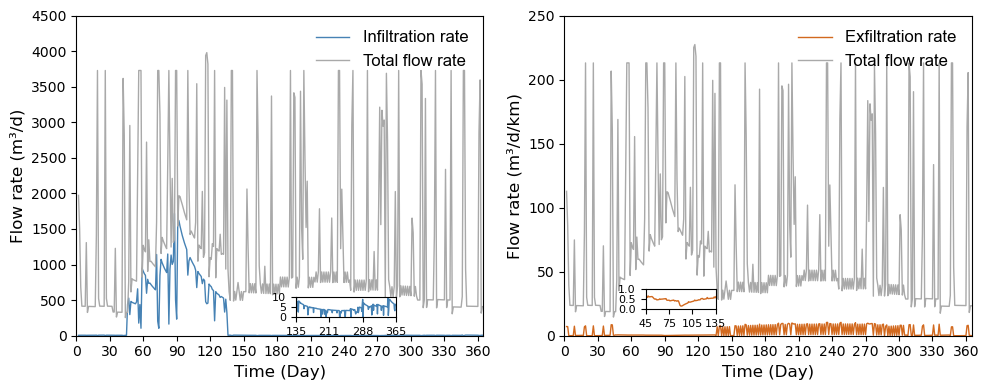

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

# خواندن داده‌ها
time = pd.read_csv("timestep.csv").squeeze()
df_in = pd.read_csv("IN.csv")
df_ex = pd.read_csv("EX.csv")
df_total = pd.read_csv("totalflow.csv").squeeze()
df_total_ex = pd.read_csv("totalflow_Ex.csv").squeeze()  # فایل جدید برای Ex

# تنظیمات فونت
tick_fontsize = 10
label_fontsize = 12
annotation_fontsize = 14
legend_font = {'size': 12, 'family': 'Arial'}

# ساخت شکل و دو محور کنار هم بدون sharey
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# ======= نمودار Infiltration =======
for col in df_in.columns:
    ax1.plot(time, df_in[col], color='steelblue', linewidth=1, label="Infiltration rate")

ax1.plot(time, df_total, color='darkgray', linewidth=1, label="Total flow rate")

ax1.text(0.01, 0.95, '', transform=ax1.transAxes,
         fontsize=annotation_fontsize, va='top', ha='left')

ax1.set_xlabel("Time (Day)", fontsize=label_fontsize)
ax1.set_ylabel("Flow rate (m³/d)", fontsize=label_fontsize)
ax1.set_xticks(range(0, 366, 30))
ax1.set_xlim(0, 365)
ax1.set_ylim(0, 4500)
ax1.tick_params(axis='both', labelsize=tick_fontsize)
ax1.legend(loc='upper right', frameon=False, prop=legend_font)

# ======= inset برای Infiltration =======
ax1_inset = inset_axes(ax1, width=1, height=0.2,
                       bbox_to_anchor=(0.54, 0.12),
                       bbox_transform=ax1.transAxes,
                       loc='upper left', borderpad=0)

mask_in = (time >= 135) & (time <= 365)
for col in df_in.columns:
    ax1_inset.plot(time[mask_in], df_in[col][mask_in], color='steelblue', linewidth=1)

ax1_inset.set_xlim(135, 365)
ax1_inset.set_ylim(0, 10)
ax1_inset.tick_params(axis='both', labelsize=8)
ax1_inset.set_xticks(np.linspace(135, 365, 4, dtype=int))
ax1_inset.set_yticks([0, 5, 10])

# ======= نمودار Exfiltration =======
for col in df_ex.columns:
    ax2.plot(time, df_ex[col], color='chocolate', linewidth=1, label="Exfiltration rate")

ax2.plot(time, df_total_ex, color='darkgray', linewidth=1, label="Total flow rate")  # فایل جدید

ax2.text(0.01, 0.95, '', transform=ax2.transAxes,
         fontsize=annotation_fontsize, va='top', ha='left')

# برگرداندن محور عمودی با برچسب جدید
ax2.set_ylabel("Flow rate (m³/d/km)", fontsize=label_fontsize)
ax2.tick_params(axis='y', labelsize=tick_fontsize)

ax2.set_xlabel("Time (Day)", fontsize=label_fontsize)
ax2.set_xticks(range(0, 366, 30))
ax2.set_xlim(0, 365)
ax2.set_ylim(0, 250)
ax2.tick_params(axis='x', labelsize=tick_fontsize)
ax2.legend(loc='upper right', frameon=False, prop=legend_font)

# ======= inset برای Exfiltration در جای اصلی خودش =======
ax2_inset = inset_axes(ax2, width=0.7, height=0.2,
                       bbox_to_anchor=(0.2, 0.146),
                       bbox_transform=ax2.transAxes,
                       loc='upper left', borderpad=0)

mask_ex = (time >= 45) & (time <= 135)
for col in df_ex.columns:
    ax2_inset.plot(time[mask_ex], df_ex[col][mask_ex], color='chocolate', linewidth=1)

ax2_inset.set_xlim(45, 135)
ax2_inset.set_ylim(0, 1)
ax2_inset.tick_params(axis='both', labelsize=8)
ax2_inset.set_xticks(np.linspace(45, 135, 4, dtype=int))
ax2_inset.set_yticks([0, 0.5, 1])

plt.tight_layout()
plt.savefig("in_ex_horizontal.png", dpi=1200, bbox_inches='tight')
plt.show()


C:\Users\Mahla\AppData\Local\Temp\ipykernel_3868\2391202552.py:55: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().set_visible(False)


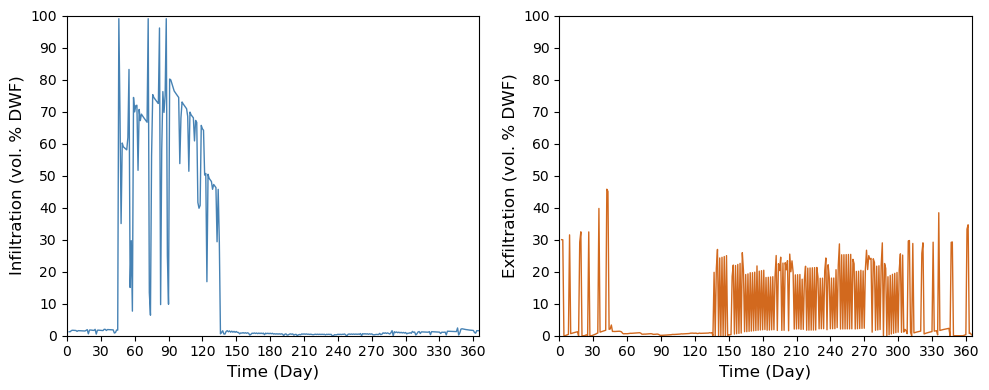

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# خواندن داده‌ها (درصد آماده)
time = pd.read_csv("timestep.csv").squeeze()
df_in = pd.read_csv("In_flownR%.csv")
df_ex = pd.read_csv("Ex_flownR%.csv")

# تنظیمات فونت
tick_fontsize = 10
label_fontsize = 12
annotation_fontsize = 14
legend_font = {'size': 12, 'family': 'Arial'}

# ساخت دو نمودار افقی کنار هم
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=False)

# ======= نمودار Infiltration =======
ax1 = axes[0]
for col in df_in.columns:
    ax1.plot(time, df_in[col], color='steelblue', linewidth=1)

ax1.text(0.01, 0.95, '', transform=ax1.transAxes,
         fontsize=annotation_fontsize, va='top', ha='left')

ax1.tick_params(axis='both', labelsize=tick_fontsize)
ax1.set_ylabel("Infiltration (vol. % DWF)", fontsize=label_fontsize)
ax1.set_ylim(0, 100)
ax1.set_yticks(range(0,101, 10))

ax1.set_xlim(0, 365)
ax1.set_xticks(range(0, 366, 30))

ax1.set_xlabel("Time (Day)", fontsize=label_fontsize)

# ======= نمودار Exfiltration =======
ax2 = axes[1]
for col in df_ex.columns:
    ax2.plot(time, df_ex[col], color='chocolate', linewidth=1)

ax2.text(0.01, 0.95, '', transform=ax2.transAxes,
         fontsize=annotation_fontsize, va='top', ha='left')

ax2.set_xlabel("Time (Day)", fontsize=label_fontsize)
ax2.set_ylabel("Exfiltration (vol. % DWF)", fontsize=label_fontsize)  # اضافه کردن ylabel
ax2.set_ylim(0, 100)
ax2.set_yticks(range(0,101, 10))

ax2.set_xlim(0, 365)
ax2.set_xticks(range(0, 366, 30))
ax2.tick_params(axis='both', labelsize=tick_fontsize)  # نمایش اعداد محور عمودی

# حذف legend چون فقط یک خط هست
for ax in axes:
    ax.legend().set_visible(False)

plt.tight_layout()
plt.savefig("infiltration_exfiltration_percent.png", dpi=1200, bbox_inches='tight')
plt.savefig("infiltration_exfiltration_percent.eps", dpi=1200, bbox_inches='tight')
plt.show()


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# ===== خواندن زمان =====
time = pd.read_csv("timestep.csv").squeeze()

# فایل‌های IN و EX برای هر زیرحوزه
catchments = {
    "Sub1": {"IN": "Sub1_IN.csv", "EX": "Sub1_EX.csv"},
    "Sub2": {"IN": "Sub2_IN.csv"},
    "Sub3": {"IN": "Sub3_IN.csv"},
    "Sub4": {"IN": "Sub4_IN.csv"},
    "Sub5": {"IN": "Sub5_IN.csv"},
    "Sub6": {"EX": "Sub6_EX.csv"}
}

# رنگ‌های ثابت برای هر زیرحوزه
colors = {
    "Sub1_IN": "royalblue",     # پررنگ
    "Sub1_EX": "deepskyblue",   # کم‌رنگ
    "Sub2_IN": "forestgreen",
    "Sub3_IN": "darkorange",
    "Sub4_IN": "purple",
    "Sub5_IN": "crimson",
    "Sub6_EX": "gold"
}

# تنظیمات فونت و موقعیت برچسب‌ها
tick_fontsize = 10
label_fontsize = 12
annotation_fontsize = 12
annotation_x = 0.02
annotation_y = 0.95
annotation_weight = 'normal'

# ساخت شکل با 6 پنل (2 ردیف × 3 ستون)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7), sharex=True, sharey=True)
axes = axes.flatten()

letters = [
    '(a) Catchment 1',
    '(b) Catchment 2',
    '(c) Catchment 3',
    '(d) Catchment 4',
    '(e) Catchment 5',
    '(f) Catchment 6'
]

# حلقه روی هر زیرحوزه
for i, (sub, files) in enumerate(catchments.items()):
    ax = axes[i]

    # رسم IN (اگر موجود بود)
    if "IN" in files:
        df_in = pd.read_csv(files["IN"])
        for col in df_in.columns:
            ax.plot(time, df_in[col],
                    linewidth=1,
                    color=colors.get(f"{sub}_IN", "black"),
                    label="Infiltration")

    # رسم EX (اگر موجود بود)
    if "EX" in files:
        df_ex = pd.read_csv(files["EX"])
        for col in df_ex.columns:
            ax.plot(time, df_ex[col],
                    linewidth=1,
                    color=colors.get(f"{sub}_EX", "black"),
                    linestyle="-" if sub != "Sub1" else "-",
                    label="Exfiltration")

    # تنظیم محور‌ها
    ax.tick_params(axis='both', labelsize=tick_fontsize)
    ax.set_xlim(0, 365)
    ax.set_xticks(range(0, 366, 60))
    ax.set_ylim(0, 240)

    # افزودن برچسب (a), (b), ...
    ax.text(annotation_x, annotation_y, letters[i],
            transform=ax.transAxes,
            fontsize=annotation_fontsize,
            fontweight=annotation_weight,
            ha='left', va='top')

    # ستون اول اعداد محور y دارد، بقیه ستون‌ها بدون تغییر
    if i % 3 == 0:
        ax.set_ylabel("Flow (m$^3$ d$^{-1}$ km$^{-1}$)", fontsize=label_fontsize)

    # برچسب محور x فقط برای ردیف آخر
    if i >= 3:
        ax.set_xlabel("Time (Day)", fontsize=label_fontsize)

    # افزودن راهنما برای همه پنل‌ها
    ax.legend(fontsize=9, loc="upper right", frameon=False)

# کم کردن فاصله بین پنل‌ها به حداقل
plt.subplots_adjust(wspace=0.05, hspace=0.05)

plt.savefig("Sub_in_ex_all.eps", dpi=1200)
plt.savefig("Sub_in_ex_all.png", dpi=1200)

plt.show()


In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import matplotlib.patheffects as path_effects

shapefile_names = [
    "sub1.shp", "sub2shp.shp", "sub3shp.shp",
    "sub4shp.shp", "sub5shp.shp", "sub6shp.shp",
    "sewershedbshp.shp"
]

shapefile_colors = {
    "sub1.shp": "royalblue",
    "sub2shp.shp": "forestgreen",
    "sub3shp.shp": "darkorange",
    "sub4shp.shp": "purple",
    "sub5shp.shp": "red",
    "sub6shp.shp": "gold"
}

folder_path = r"C:\Users\Mahla\Documents\shapefiles"

labels = {name: f" {i+1}" for i, name in enumerate(shapefile_names[:-1])}

label_offsets = {
    "sub1.shp": {"up": 100, "down": 0, "left": 0, "right": 50},
    "sub2shp.shp": {"up": 250, "down": 100, "left": 100, "right": 0},
    "sub3shp.shp": {"up": 0, "down": 200, "left": 100, "right": 300},
    "sub4shp.shp": {"up": 20, "down": 300, "left": 300, "right": 20},
    "sub5shp.shp": {"up": 0, "down": 30, "left": 0, "right": 0},
    "sub6shp.shp": {"up": 50, "down": 0, "left": 50, "right": 100}
}

fig, ax = plt.subplots(figsize=(12, 10))

for name in shapefile_names:
    full_path = os.path.join(folder_path, name)
    gdf = gpd.read_file(full_path)

    if name == "sewershedbshp.shp":
        gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
    else:
        color = shapefile_colors.get(name, 'gray')
        gdf.plot(ax=ax, color=color, edgecolor='white', alpha=0.7, linewidth=1)

        label = labels.get(name, None)
        if label:
            offset = label_offsets.get(name, {"up": 0, "down": 0, "left": 0, "right": 0})

            for idx, row in gdf.iterrows():
                centroid = row.geometry.centroid
                x = centroid.x + offset["right"] - offset["left"]
                y = centroid.y + offset["up"] - offset["down"]

                # تغییر رنگ متن برای sub1، sub2 و sub4
                text_color = 'white' if name in ["sub1.shp", "sub2shp.shp", "sub4shp.shp"] else 'black'
                
                ax.text(x, y, label, fontsize=32,
                        ha='center', va='center', color=text_color,
                        path_effects=[path_effects.withStroke(linewidth=1)])

# اضافه کردن دوباره sub6 فقط با مرز مشکی و داخل بی‌رنگ
sub6_path = os.path.join(folder_path, "sub6shp.shp")
gdf_sub6 = gpd.read_file(sub6_path)
gdf_sub6.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

ax.set_axis_off()

output_path = os.path.join(os.getcwd(), "shapefiles.eps")
plt.savefig(output_path, dpi=1200, bbox_inches='tight', pad_inches=0,)

output_path_png = os.path.join(os.getcwd(), "shapefiles.png")
plt.savefig(output_path_png, dpi=1200, bbox_inches='tight', pad_inches=0)

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
